In [50]:
import numpy as np
import astropy.units as u
from GalaxyMass import ComponentMass
from ReadFile import Read 
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
#imports read file, component mass function, numpy, and astropy units

In [51]:
#initialize files
f1 = "MW_000.txt" 
f2 = "M31_000.txt"
f3 = "M33_000.txt"

In [52]:
#call the functions and 
MWHalo = ComponentMass(f1, 1.0)
MWDisk = ComponentMass(f1, 2.0)
MWBulge = ComponentMass(f1, 3.0)
M31Halo = ComponentMass(f2, 1.0)
M31Disk = ComponentMass(f2, 2.0)
M31Bulge = ComponentMass(f2, 3.0)
M33Halo = ComponentMass(f3, 1.0)
M33Disk = ComponentMass(f3, 2.0)

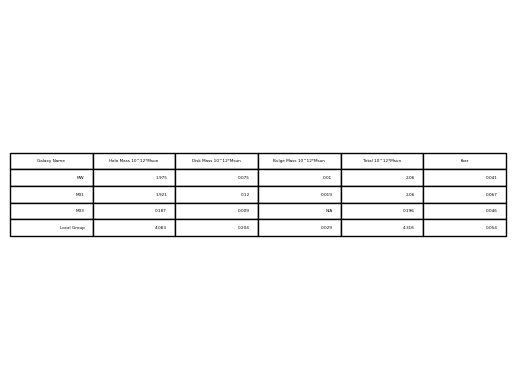

In [75]:
#create data set
data = {
        'Galaxy Name': ['MW', 'M31', 'M33', 'Local Group'], 
        'Halo Mass 10^12*Msun': [MWHalo, M31Halo, M33Halo, np.sum([MWHalo, M31Halo, M33Halo])], 
        'Disk Mass 10^12*Msun' : [MWDisk, M31Disk, M33Disk, np.round(np.sum([MWDisk, M31Disk, M33Disk]), 3)],
        'Bulge Mass 10^12*Msun': [MWBulge, M31Bulge, 'N/A', np.round(np.sum([MWBulge, M31Bulge]), 3)],
        'Total 10^12*Msun': [np.sum([MWHalo, MWDisk, MWBulge]), np.sum([M31Halo, M31Disk, M31Bulge]), np.sum([M33Halo, M33Disk]), 
                             np.sum([np.sum([MWHalo, MWDisk, MWBulge]), np.sum([M31Halo, M31Disk, M31Bulge]), np.sum([M33Halo, M33Disk])])],
        'fbar': [np.round(np.sum([MWDisk, MWBulge])/np.sum([MWHalo, MWDisk, MWBulge]), 3), 
                 np.round(np.sum([M31Disk, M31Bulge])/np.sum([M31Halo, M31Disk, M31Bulge]), 3),
                 np.round(M33Disk/np.sum([M33Halo, M33Disk]), 3),
                 np.round((.204+.029)/4.316, 3)]
    }
df = pd.DataFrame(data) #create data frame
fig, ax = plt.subplots() #initialize a figure and axis
ax.axis('off') #hides axis
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center') #create a figure
plt.savefig("table.pdf") #save figure

    